In [1]:
from IPython.display import display, Latex, Markdown
import numpy as np
from numpy import linalg as LA
import sympy as sp
import lcapy as lcp
from lcapy import s
import control as ctrl
from control import matlab
import math
import cmath
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({
                     'figure.figsize':[16,9],
                     'font.size': 22, 
                     'xaxis.labellocation': 'right',
                     'yaxis.labellocation': 'top'});

### Para o sistema dado por:

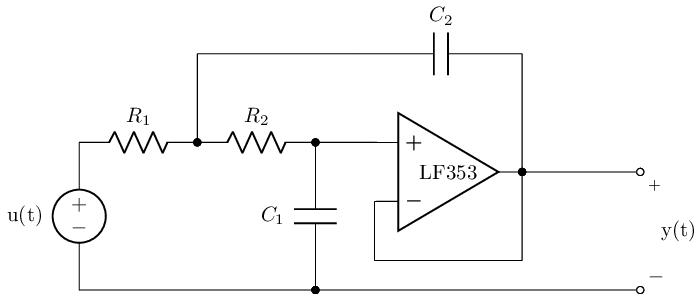

<h3>                      <ul>                           <li> R1 = 60000 $\Omega$;</li>                           <li> R2 = 18000 $\Omega$;</li>                           <li> C1 = 100e-9 F;</li>                           <li> C2 = 680e-9 F;</li>                      </ul>                  </h3>

### Projetar um sistema de realimentação de estados                  de forma que a saída tenha erro nulo em regime permanente                  para uma entrada tipo degrau unitário e que as raízes; <br>                  -2,112676056338028e+002 +2,882485254595439e+002i e <br>                  -2,112676056338028e+002 -2,882485254595439e+002i <br>                  sejam polos de malha fechada.

In [2]:
circuito = lcp.Circuit("""
R1 1 2 R1; right, scale=0.8, l^=R_1
R2 2 3 R2; right, scale=0.8, l^=R_2
C1 3 0_3 C1; down, scale=0.8, l_=C_1
W 3 3_4; right, size=0.5
E1 6 0_3 opamp 3_4 5_6 Av; scale=0.5, size=0.5, l=LF353
W 5_6 5_8; down, size=0.5
C2 3_1 6_1 C2; right, scale=0.8, l^=C_2
W 6_1 6; down
W 6 6_8; down, size=0.7
W 6_8 5_8; left
W 2 2_1; up=0.75
W 2_1 3_1; right
W 6 7; right
W 0 0_3; right
W 0_3 0_7; right
V 1 0 {u(t)}; down, l_={\mathrm{u(t)}}
P2 7 0_7; down, v^=y(t)
; draw_nodes=connections, label_ids=none, label_nodes=none""");

sistema = circuito.ss;

display(Markdown('### Para o sistema dado por:'));
circuito.draw();
display(Markdown('<h3> \
                     <ul> \
                          <li> R1 = 60000 $\Omega$;</li> \
                          <li> R2 = 18000 $\Omega$;</li> \
                          <li> C1 = 100e-9 F;</li> \
                          <li> C2 = 680e-9 F;</li> \
                     </ul> \
                 </h3>'));
display(Markdown('### Projetar um sistema de realimentação de estados \
                 de forma que a saída tenha erro nulo em regime permanente \
                 para uma entrada tipo degrau unitário e que as raízes; <br> \
                 -2,112676056338028e+002 +2,882485254595439e+002i e <br> \
                 -2,112676056338028e+002 -2,882485254595439e+002i <br> \
                 sejam polos de malha fechada.'));

In [3]:
# Espaço de estados do sistema:

R1 = lcp.symbol('R1', positive=True);
R2 = lcp.symbol('R2', positive=True);
C1 = lcp.symbol('C1', positive=True);
C2 = lcp.symbol('C2', positive=True);
Av = lcp.symbol('Av', positive=True);

A = (sistema.A.simplify()).limit(Av, 'oo');
B = (sistema.B.simplify()).limit(Av, 'oo');
C = (sistema.C.row(-1).simplify()).limit(Av, 'oo');
D = (sistema.D.row(-1).simplify()).limit(Av, 'oo');

display(Markdown('### Matriz de estados:'));
display(Latex('$ \mathbf{A} = '+str(A.latex())+'$'));
display(Markdown('### Matriz de entrada:'));
display(Latex('$ \mathbf{B} = '+str(B.latex())+'$'));
display(Markdown('### Matriz de saída:'));
display(Latex('$ \mathbf{C} = '+str(C.latex())+'$'));
display(Markdown('### Matriz de transmissão direta:'));
display(Latex('$ \mathbf{D} = '+str(D.latex())+'$'));

### Matriz de estados:

<IPython.core.display.Latex object>

### Matriz de entrada:

<IPython.core.display.Latex object>

### Matriz de saída:

<IPython.core.display.Latex object>

### Matriz de transmissão direta:

<IPython.core.display.Latex object>

In [4]:
# Substituição de valores no espaço de estados do sistema:

defs = {R1 : 60000, R2 : 18000, C1 : 100e-9, C2 : 680e-9};

A = A.subs(defs);
B = B.subs(defs);
C = C.subs(defs);
D = D.subs(defs);

display(Markdown('### Matriz de estados:'));
display(Latex('$ \mathbf{A} = '+str(A.latex())+'$'));
display(Markdown('### Matriz de entrada:'));
display(Latex('$ \mathbf{B} = '+str(B.latex())+'$'));
display(Markdown('### Matriz de saída:'));
display(Latex('$ \mathbf{C} = '+str(C.latex())+'$'));
display(Markdown('### Matriz de transmissão direta:'));
display(Latex('$ \mathbf{D} = '+str(D.latex())+'$'));

### Matriz de estados:

<IPython.core.display.Latex object>

### Matriz de entrada:

<IPython.core.display.Latex object>

### Matriz de saída:

<IPython.core.display.Latex object>

### Matriz de transmissão direta:

<IPython.core.display.Latex object>

In [5]:
# Avaliação da controlabilidade do espaço de estados do sistema:

A = np.matrix(A.tolist(), dtype=np.float64);
B = np.matrix(B.tolist(), dtype=np.float64);
C = np.matrix(C.tolist(), dtype=np.float64);
D = np.matrix(D.tolist(), dtype=np.float64);

# Matriz de Controlabilidade

Mc = np.block([[A, B],[-C, 0]]);

display(Markdown('### Matrix de controlabilidade:'));
display(Latex('$ \mathbf{M_{c}} = '+str(sp.latex(sp.Matrix(Mc))).replace('.',',')+' $'));
display(Markdown('### Posto da matriz de controlabilidade:'));
display(Latex('$ \mathrm{posto} \, (\mathbf{M_{c}}) = '+str(np.linalg.matrix_rank(Mc))+' $'));
display(Markdown('### O sistema é de estados completamente controláveis.'));

### Matrix de controlabilidade:

<IPython.core.display.Latex object>

### Posto da matriz de controlabilidade:

<IPython.core.display.Latex object>

### O sistema é de estados completamente controláveis.

In [6]:
# Autovalores desejados:

autovalores = [-2.112676056338028e+002-1j*2.882485254595439e+002, -2.112676056338028e+002+1j*2.882485254595439e+002];
autovalores.append(0);

# Matrizes expandidas:

A_servo = np.block([[A, np.zeros_like(C.T)],[-C, 0]]);
B_servo = np.block([[B],[0]]);

# Matriz de ganhos do controlador K_servo = [k1 k2 -ki]:

K_servo = ctrl.acker(A_servo, B_servo, autovalores);
autovalores_servo = LA.eig(A_servo-B_servo*K_servo)[0];

display(Markdown('### Matriz de estados expandida:'));
display(Latex('$ \mathbf{\hat{A}} = '+str(sp.latex(sp.Matrix(A_servo))).replace('.',',')+'$'));
display(Markdown('### Matriz de entrada expandida:'));
display(Latex('$ \mathbf{\hat{B}} = '+str(sp.latex(sp.Matrix(B_servo))).replace('.',',')+'$'));
display(Markdown('### Matriz de realimentação de estados expandida:'));
display(Latex('$ \mathbf{\hat{K}} = '+str(sp.latex(sp.Matrix(K_servo))).replace('.',',')+'$'));
display(Markdown('### Autovalores desejados:'));
display(Markdown('$ \mathbf{\mu} = '+str(autovalores).replace(',','; \ ').replace('.',',')+'$'));
display(Markdown('### Autovalores obtidos:'));
display(Latex('$ \mathbf{\hat{\mu}} = '+str(list(autovalores_servo)).replace(',','; \ ').replace('.',',')+'$'));

### Matriz de estados expandida:

<IPython.core.display.Latex object>

### Matriz de entrada expandida:

<IPython.core.display.Latex object>

### Matriz de realimentação de estados expandida:

<IPython.core.display.Latex object>

### Autovalores desejados:

$ \mathbf{\mu} = [(-211,2676056338028-288,2485254595439j); \  (-211,2676056338028+288,2485254595439j); \  0]$

### Autovalores obtidos:

<IPython.core.display.Latex object>

In [7]:
K = K_servo.tolist()[0];
K = np.matrix([k for k in K[0:len(K)-1]]);
ki = -(K_servo.tolist()[0][-1]);
AA = np.block([[A-B*K, B*ki],[-C, 0]]);
BB = np.matrix(np.array([[*np.zeros(len(autovalores))]]).T);
BB[-1] = 1;
CC = np.matrix(C.tolist()[0]+[float(0)]);
DD = np.matrix([float(0)]);

display(Markdown('### Matriz de estados:'));
display(Latex('$ \mathbf{A} = '+str(sp.latex(sp.Matrix(AA))).replace('.',',')+'$'));
display(Markdown('### Matriz de entrada:'));
display(Latex('$ \mathbf{B} = '+str(sp.latex(sp.Matrix(BB))).replace('.',',')+'$'));
display(Markdown('### Matriz de saída:'));
display(Latex('$ \mathbf{C} = '+str(sp.latex(sp.Matrix(CC))).replace('.',',')+'$'));
display(Markdown('### Matriz de transmissão direta:'));
display(Latex('$ \mathbf{D} = '+str(sp.latex(sp.Matrix(DD))).replace('.',',')+'$'));
display(Markdown('### Representação no espaço de estados:'));
display(Latex('$ \\left[\\begin{matrix} \\mathbf{\\dot{x}} (t) \\\\ \\dot{\\xi} (t) \\end{matrix}\\right] = '+
              str(sp.latex(sp.Matrix(AA))).replace('.',',')+
              '\\left[\\begin{matrix} \\mathbf{x} (t) \\\\ \\xi (t) \\end{matrix}\\right]+'+
              str(sp.latex(sp.Matrix(BB))).replace('.',',')+'r(t)$'));
display(Latex('$y = '+str(sp.latex(sp.Matrix(CC))).replace('.',',')+
              '\\left[\\begin{matrix} \\mathbf{x} (t) \\\\ \\xi (t) \\end{matrix}\\right]$'));

### Matriz de estados:

<IPython.core.display.Latex object>

### Matriz de entrada:

<IPython.core.display.Latex object>

### Matriz de saída:

<IPython.core.display.Latex object>

### Matriz de transmissão direta:

<IPython.core.display.Latex object>

### Representação no espaço de estados:

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

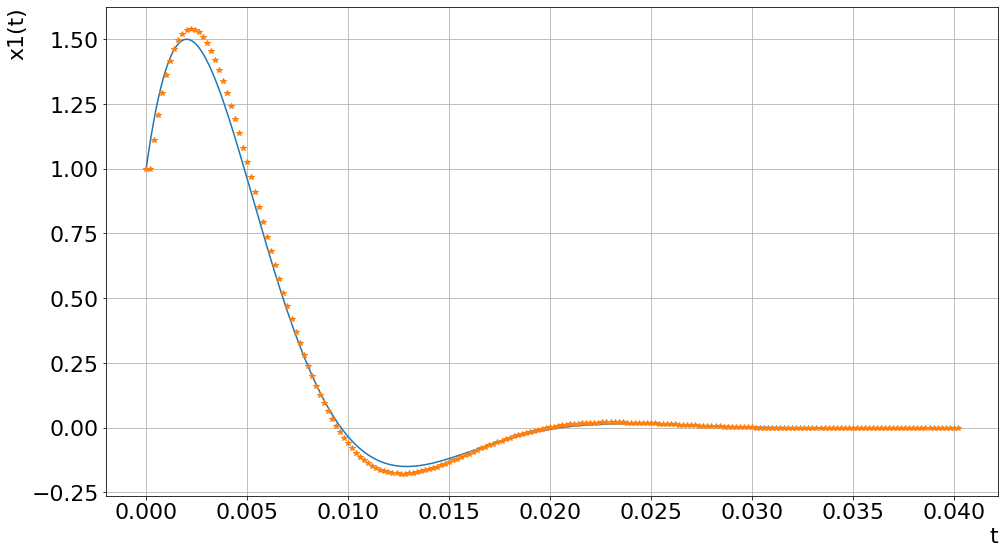

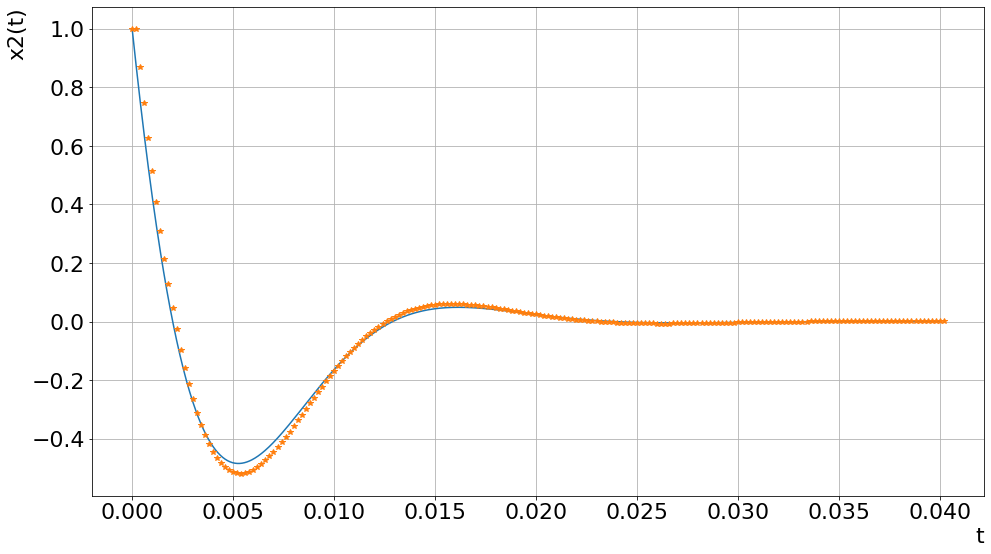

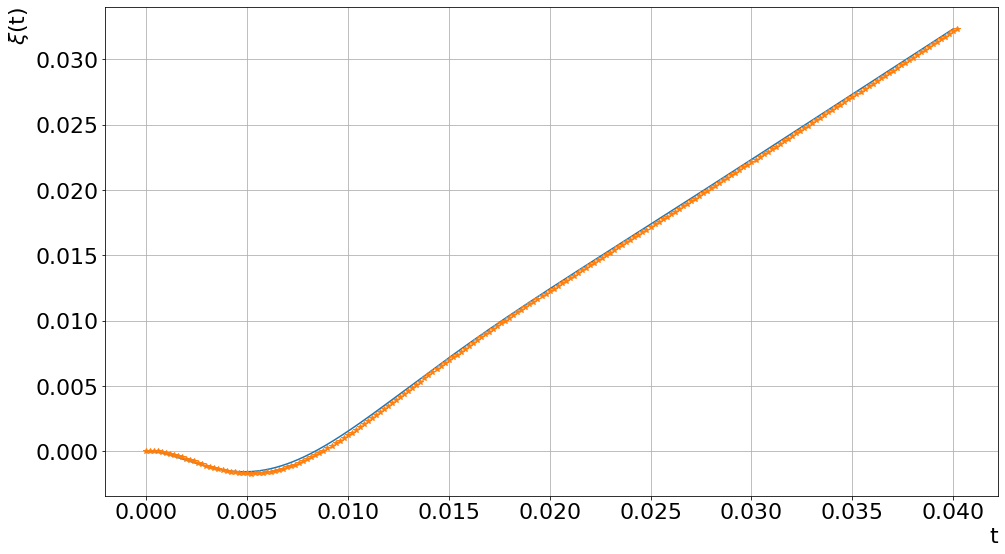

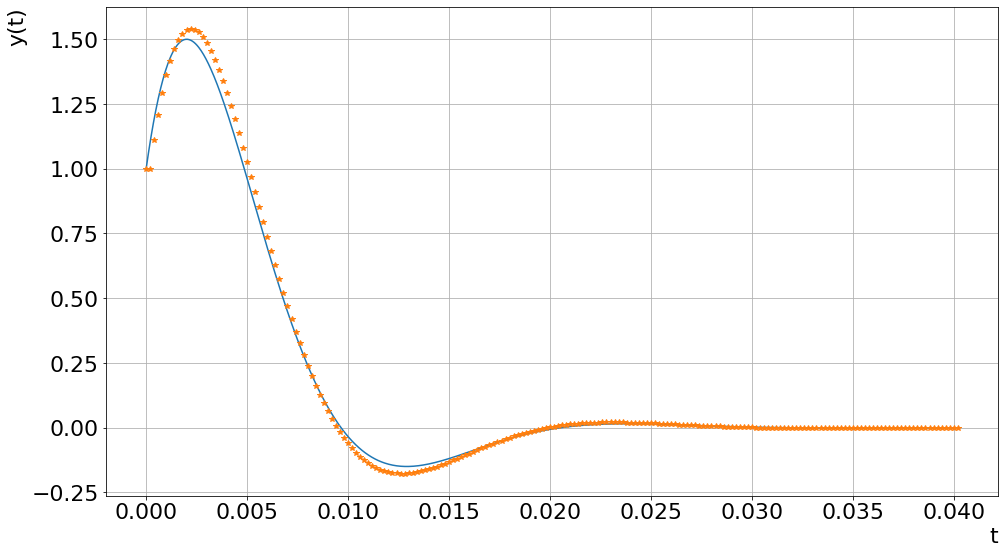

In [8]:
# Sistema de espaço de estados
sistema_servo = ctrl.ss(AA,BB,CC,DD);

# Condições Iniciais
x0 = np.matrix([[1], [1], [0]]);

# Simulação do sistema
t = np.linspace(0, 40e-3, 1000);
u = np.zeros_like(t);
Y, t, X = ctrl.matlab.step(sistema_servo, t, x0, return_x=True);

x1a = X[:,0];
x1b = X[:,1];
x1c = X[:,2];

# Simulação com discretização dos integradores
# I(z)=T/(z-1)=Xi(z)/Xi_ponto(z)=E(z)/E_ponto(z)
# xi(k)=T*xi_ponto(k-1)+xi(k-1)
# e(k)=T*e_ponto(k-1)+e(k-1)

T = 200e-6;
tfinal = 40e-3;
Kmax = int(tfinal/T+1);
k = np.linspace(0, Kmax, Kmax+1);
r = np.heaviside(k, 1);

x1 = np.zeros_like(k);
x2 = np.zeros_like(k);
e = np.zeros_like(k);
u = np.zeros_like(k);
x1_ponto = np.zeros_like(k);
x2_ponto = np.zeros_like(k);
e_ponto = np.zeros_like(k);
y = np.zeros_like(k);

# Condições iniciais (podem ser diferentes de zero)
x1[0] = x0[0];  #  para k = 0
x2[0] = x0[1];  #  para k = 0
e[0] = x0[2];  #  para k = 0
u[0] = -(K[0,0]*x1[0]+K[0,1]*x2[0])+ki*e[0];
x1_ponto[0] = 0;  #  para k = 0
x2_ponto[0] = 0;  #  para k = 0
e_ponto[0] = 0;  #  para k = 0
y[0] = CC[0,0]*x1[0]+CC[0,1]*x2[0]+CC[0,2]*e[0]+DD*u[0];  #  para k = 0

for j in range(1,Kmax+1):
    # Equações dos integradores:
    x1[j] = T*x1_ponto[j-1]+x1[j-1];
    x2[j] = T*x2_ponto[j-1]+x2[j-1];    
    e[j] = T*e_ponto[j-1]+e[j-1];
    # Equação da diferença do sinal de controle:
    u[j] = -(K[0,0]*x1[j]+K[0,1]*x2[j])+ki*e[j];
    # Equação diferencial de estados:  Xponto=A*X+B*U
    x1_ponto[j] = AA[0,0]*x1[j]+AA[0,1]*x2[j]+AA[0,2]*e[j]+BB[0]*u[j];  
    x2_ponto[j] = AA[1,0]*x1[j]+AA[1,1]*x2[j]+AA[1,2]*e[j]+BB[1]*u[j]; 
    # Equação de Saída: Y=C*X+D*U
    y[j] = CC[0,0]*x1[j]+CC[0,1]*x2[j]+CC[0,2]*e[j]+DD*u[j];
    # Equação diferencial do erro: Eponto=R-Y
    e_ponto[j] = r[j]-y[j];
    
# Comportamento do estado x1                       
plt.figure();
plt.plot(t, x1a, k*T, x1,'*');
plt.xlabel("t");
plt.ylabel("x1(t)");
plt.grid();

# Comportamento do estado x2                       
plt.figure();
plt.plot(t, x1b, k*T, x2,'*');
plt.xlabel("t");
plt.ylabel("x2(t)");
plt.grid();

# Comportamento da saída do integrador:                       
plt.figure();
plt.plot(t, x1c, k*T, e,'*');
plt.xlabel("t");
plt.ylabel("$\\xi$(t)");
plt.grid();

# Comportamento da saída y                      
plt.figure();
plt.plot(t, Y, k*T, y,'*');
plt.xlabel("t");
plt.ylabel("y(t)");
plt.grid();
plt.show();

## Diagrama de blocos

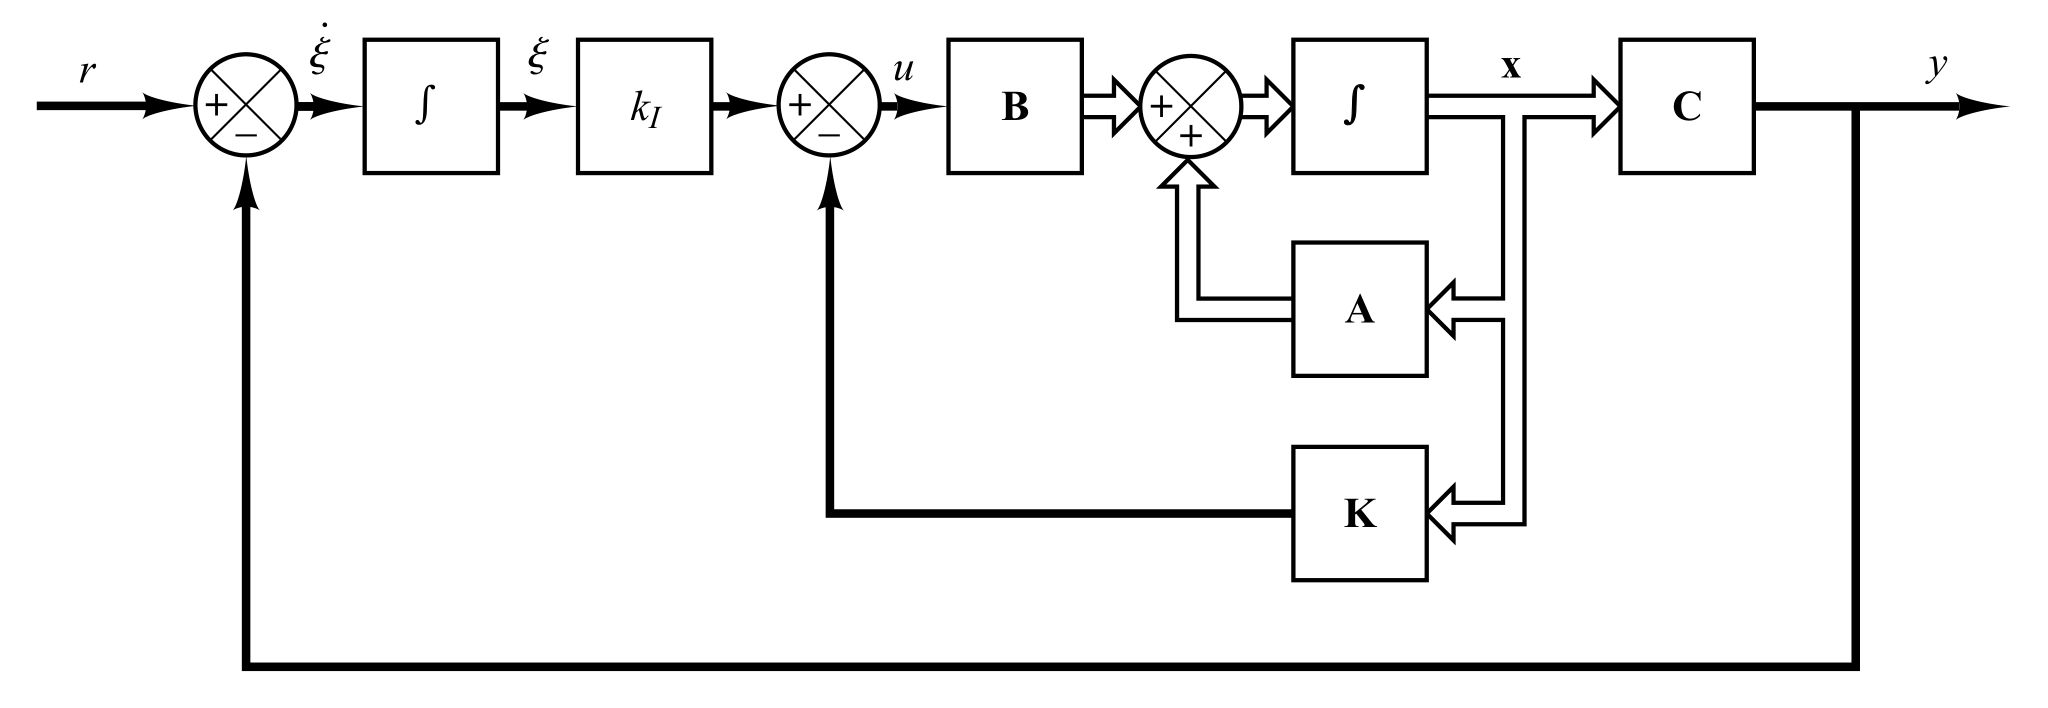